Based on video from Lesson 1 of "Practical Deep Learning for Coders" course

In [ ]:
!pip install fastbook


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('puppy', max_images=1)
len(urls), urls[0]

(1,
 'http://2.bp.blogspot.com/-zy6wTxQk4Z4/UHwDjy-jp_I/AAAAAAAAARU/kQUIK705_GI/s1600/samoyed_puppy.jpg')

In [7]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

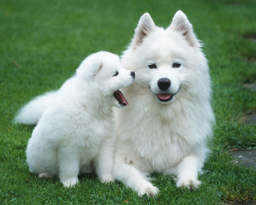

In [9]:
#from fastdownload import download_url
dest = 'puppy.jpg'
download_url(urls[0], dest, show_progress=False)

#from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

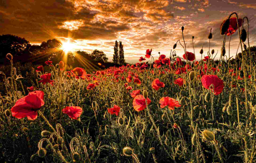

In [11]:
download_url(search_images_ddg('poppy field', max_images=1)[0], 'poppies.jpg', show_progress=False)
Image.open('poppies.jpg').to_thumb(256,256)

In [13]:
searches = 'puppy','poppy field'
path = Path('puppy_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
#import os

# Iterate over the subdirectories and count the number of JPEG files in each one
for subdir in os.listdir(path):
    if os.path.isdir(os.path.join(path, subdir)):
        num_files = len([f for f in os.listdir(os.path.join(path, subdir)) if f.endswith('.jpg')])
        print(f"{subdir}: {num_files} files")


puppy: 484 files
poppy field: 561 files


In [16]:
%ls

bird.jpg  gdrive/  poppies.jpg  puppy.jpg  puppy_or_not/  sample_data/
